# Household Electricity Consumption Forecasting

## Part 3: Statistical and Predictive Analysis

Title: Understanding Relationships and Seasonal Patterns in Electricity Usage

Purpose: Focus on multi-variable analysis, correlations, time-series visualization, detecting outliers and advanced modeling.

### Load Dataset

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('household_power_consumption.csv')
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date,Total_sub_metering,Unmetered_power,Power_to_Voltage_ratio,Reactive_to_Active_ratio,Energy_efficiency_score
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16,18.0,52.266667,0.017953,0.099146,0.900854
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16,17.0,72.333333,0.022942,0.081343,0.918657
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16,19.0,70.566667,0.023036,0.092668,0.907332
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16,18.0,71.800000,0.023051,0.093170,0.906830
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16,18.0,43.100000,0.015555,0.144026,0.855974


### Q1. Voltage trend over time

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

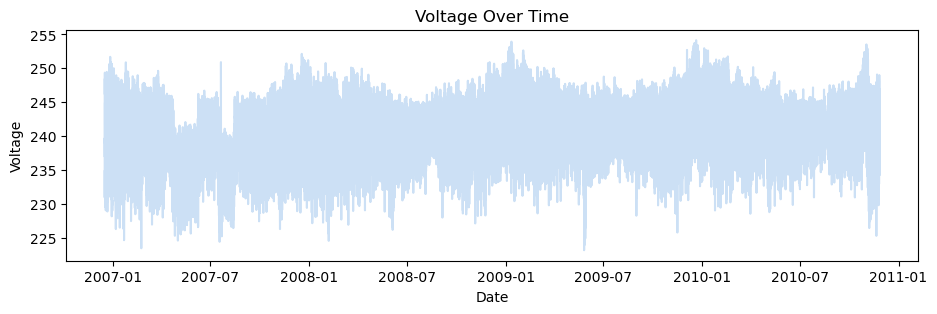

In [5]:
plt.figure(figsize=(11,3))
plt.plot(df['Datetime'], df['Voltage'], color='#CCE0F5')
plt.title('Voltage Over Time')
plt.xlabel('Date')
plt.ylabel('Voltage')
plt.show()

### Insight:
- The power supply is extremely stable across the entire three-year period, consistently clustering around the 240V mark.
- While there are a few brief, minor dips and spikes, these are quickly corrected.
- Overall, the system voltage reliability is excellent, confirming a high-quality electrical connection to the house.

### Q2. How does Global Active Power vary across weekdays?

In [6]:
from matplotlib.colors import ListedColormap
mypastel = ['#E6F0FA','#D7E9F7', '#B3D4F2', '#8EBEF0', '#6CA7E5', '#4A8CCD','#3574B3']
mypastel_cmap = ListedColormap(mypastel) # Convert your list to a ListedColormap

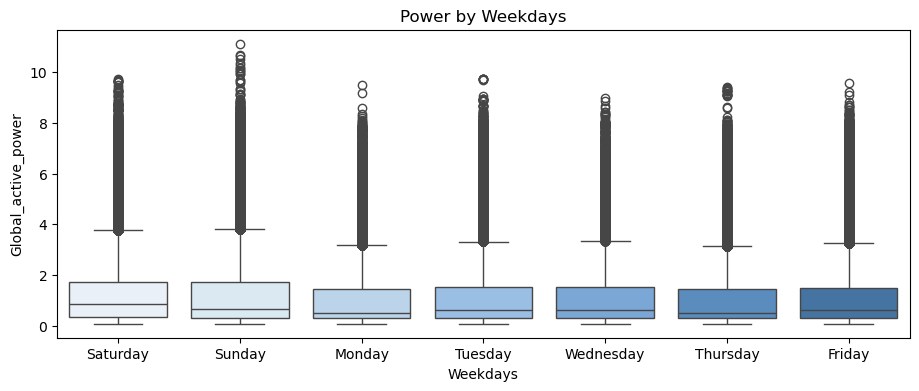

In [7]:
df['Weekdays'] = pd.to_datetime(df['Datetime']).dt.day_name()
plt.figure(figsize=(11,4))
sns.boxplot(x='Weekdays',y='Global_active_power', data=df, palette=mypastel)
plt.title('Power by Weekdays')
plt.show()

### Insight:
- The house uses a lower, more consistent amount of power during the work week (Monday to Friday).
- However, on Saturday and Sunday, the power consumption dramatically increases, showing much higher peaks and more variation due to greater activity.

### Q3. Correlation between sub-meters

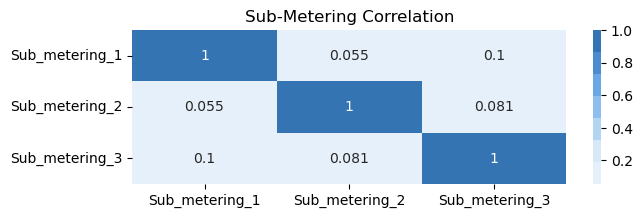

In [8]:
plt.figure(figsize=(7,2))
sns.heatmap(df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].corr(), annot=True, cmap=mypastel_cmap)
plt.title('Sub-Metering Correlation')
plt.show()

### Insight:
- All three sub-metering zones are practically independent of each other, with correlation scores close to zero.
- This means the power use in one area like the kitchen (Sub-metering 3) does not influence when power is used in other areas, such as the laundry or heating (Sub-metering 1 and 2).

### Q4. Percentage Breakdown of Hourly Power Consumption

In [9]:
from matplotlib.colors import ListedColormap
blue_pastel = ['#E6F0FA', '#DEECF8', '#D7E9F7', '#CBE2F5', '#C1DBF3', '#B3D4F2', '#A5C8EA', '#97BCE2', '#8EBEF0', '#7FB3E6', '#72A9DE', '#6CA7E5', 
               '#679FE0', '#6297DB', '#5D8FD5', '#5887D0', '#5380CB', '#4A8CCD', '#457DC4', '#4074B9', '#3B6DB0', '#3867AB', '#3771BE', '#3574B3']
mypastel_cmap = ListedColormap(blue_pastel)

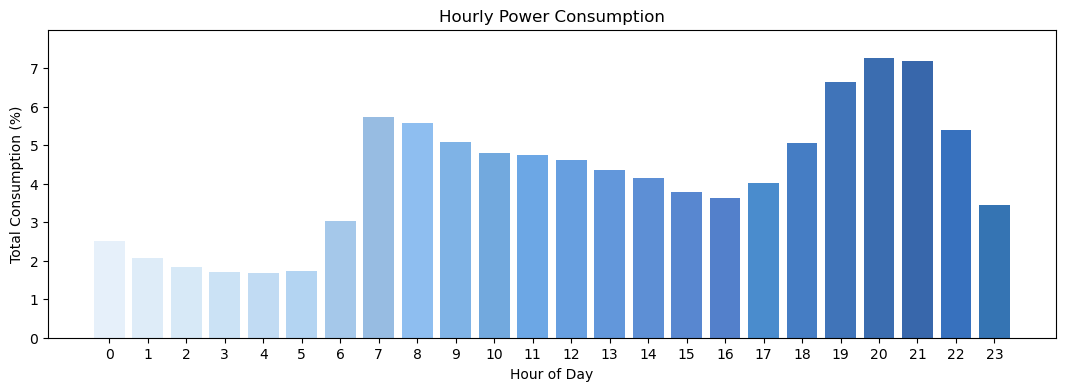

In [10]:
df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
hourly_power = df.groupby('Hour')['Global_active_power'].sum()

# Calculate percentage for each hour
hourly_percent = 100 * hourly_power / hourly_power.sum()

plt.figure(figsize=(13,4))
plt.bar(hourly_power.index, hourly_percent, color=blue_pastel)
plt.xlabel('Hour of Day')
plt.ylabel('Total Consumption (%)')
plt.title('Hourly Power Consumption')
plt.xticks(range(24))
plt.ylim(0, max(hourly_percent) * 1.10)
plt.show()

### Insight:
- Power consumption is lowest overnight but starts spiking dramatically right as the workday begins (around 7 AM).
- The highest consumption period is clearly between 7 PM and 10 PM, confirming a strong evening peak when people are home.

### Q5. Is there a significant difference in power consumption between weekdays and weekends?
This helps energy companies optimize distribution and pricing strategies.

- H₀ (Null Hypothesis): There is no significant difference in average power consumption between weekdays and weekends; any observed difference is due to random chance.​
- 
H₁ (Alternative Hypothesis): There is a significant difference in average power consumption between weekdays and weekends; the difference is statistically meaningful and not due to random chance.

In [13]:
from scipy import stats
# df['Day_of_week'] = df['Datetime'].dt.day_name()
df['Weekdays'] = pd.to_datetime(df['Datetime']).dt.day_name()
df['Is_weekend'] = df['Weekdays'].isin(['Saturday','Sunday'])

weekday = df[df['Is_weekend'] == False]['Global_active_power']
weekend = df[df['Is_weekend'] == True]['Global_active_power']

In [16]:
t_stat, p_val = stats.ttest_ind(weekday.dropna(), weekend.dropna())

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("There is significant difference in average power consumption, We will reject null hypothesis")
else:
    print("No significant difference, Fail to reject null hypothesis")

T-Statistic: -121.590
P-value: 0.0000
There is significant difference in average power consumption, We will reject null hypothesis


### Insight:
- There is significant difference in average power consumption, We will reject null hypothesis
- This statistical test confirms what most people intuitively know: the house's power consumption definitely changes when the weekend rolls around.
- The average difference between what the house uses on a workday versus a weekend is real, not just random chance.

### Q6. To determine whether voltage fluctuations influence total electricity consumption.

The Pearson correlation coefficient (corr) measures the strength and direction of a linear relationship between two variables, ranging from -1 (perfect negative) through 0 (no correlation) to +1 (perfect positive).

In [19]:
corr, p_value = stats.pearsonr(df['Voltage'].dropna(), df['Global_active_power'].dropna())
print(f"Correlation Coefficent: {corr:.3f}")
print(f"P-Value: {p_value:.4f}")

if abs(corr) > 0.5:
    print("Positive correlation between Voltage and Power.")
else:
    print("Negative correlation between Voltage and Power.")

Correlation Coefficent: -0.400
P-Value: 0.0000
Negative correlation between Voltage and Power.


### Insight:
- There is a moderate negative correlation (-0.400) between Voltage and Global Active Power, indicating that as voltage increases, power tends to decrease somewhat.
- The p-value (0.0000) shows this correlation is statistically significant, meaning it is unlikely due to random chance.
- Since the correlation coefficient's absolute value is below 0.5, the relationship is not considered strong, but the direction is clearly negative.

### Q7. To remove abnormal power readings that may distort statistical models.
(IQR Method)

In [22]:
# IQR method
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

# Remove outliers
df_clean = df[(df['Global_active_power'] >= lower) & (df['Global_active_power'] <= upper)]
print(f"Before: {len(df)}, After: {len(df_clean)} rows retained")

Before: 2049280, After: 1954373 rows retained


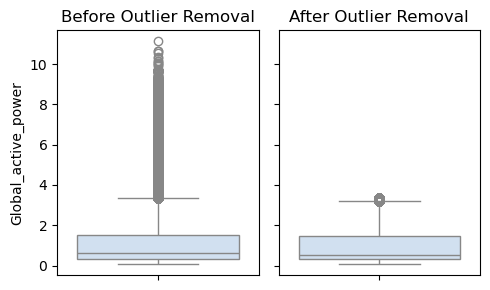

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(5,3), sharey=True)

# Boxplot before outlier removal
sns.boxplot(y=df['Global_active_power'], color='#CCE0F5', ax=axes[0])
axes[0].set_title('Before Outlier Removal')

# Boxplot after outlier removal
sns.boxplot(y=df_clean['Global_active_power'], color='#CCE0F5', ax=axes[1])
axes[1].set_title('After Outlier Removal')

plt.tight_layout()
plt.show()

### Insight:
- The boxplots show that before outlier removal, the Global Active Power data contains many outliers above 3.5, causing high variability.
- After outlier removal, the data distribution becomes tighter and more consistent, with fewer extreme values.

### Q8. To verify whether data is symmetric or skewed, important for choosing the right statistical models.

In [29]:
skew_val = df_clean['Global_active_power'].skew()
print(f"Skewness: {skew_val:.3f}")

Skewness: 0.966


In [30]:
if skew_val > 0.5:
    print("Right-skewed data (Postive Skew).")
elif skew_val < -0.5:
    print("Left-skewed data (Negative Skew).")
else:
    print("Approximately Normal Distribution.")

Right-skewed data (Postive Skew).


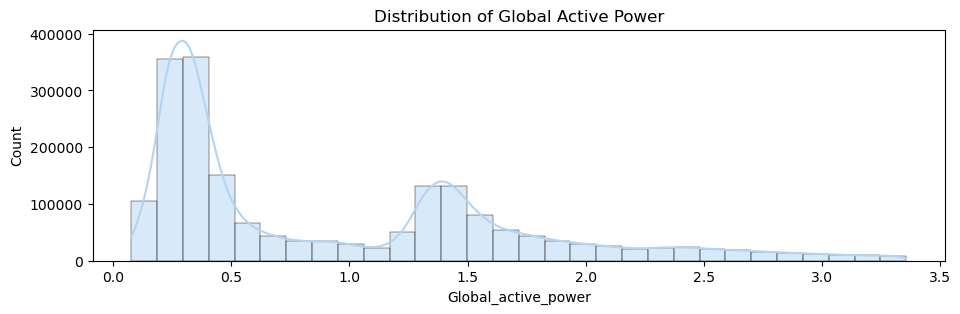

In [32]:
plt.figure(figsize=(11,3))
sns.histplot(df_clean['Global_active_power'], kde=True, bins=30, color='#B3D4F2',linewidth=0.3)
plt.title("Distribution of Global Active Power")
plt.show()

### Insight:
- The skewness value of 0.966 indicates that the distribution of Global Active Power is moderately right-skewed, with a longer tail on the higher end.
- This means most data points are concentrated at lower values, but there are a few higher values stretching the distribution rightward.
- The histogram and KDE plot visually confirm this positive skewness.

### Q9. To identify at what time and day electricity usage peaks 
Useful for demand forecasting and pricing strategy.

In [37]:
pivot = pd.pivot_table(df,values='Global_active_power',index='Weekdays', columns='Hour', aggfunc='mean')

days_order = ['Monday','Tuesday','wednesday','Thusday','Friday','Saturday','Sunday']
pivot = pivot.reindex(days_order)

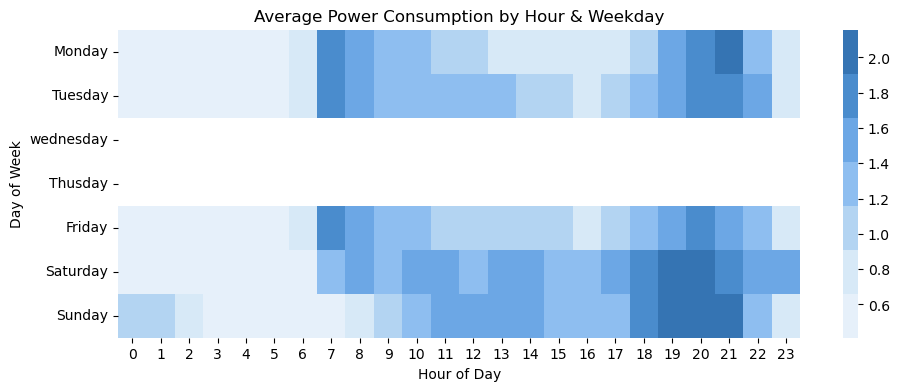

In [40]:
plt.figure(figsize=(11,4))
sns.heatmap(pivot, cmap=mypastel_cmap)
plt.title('Average Power Consumption by Hour & Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

### Insight:
- The power usage pattern clearly separates workdays from weekends.
- During the week, high consumption starts promptly at 7 AM and continues until late evening.
- Weekends, especially Sunday, show a much earlier and gentler ramp-up in power use, reflecting a more relaxed schedule.

### Q10. Pairplot to visualize relationships

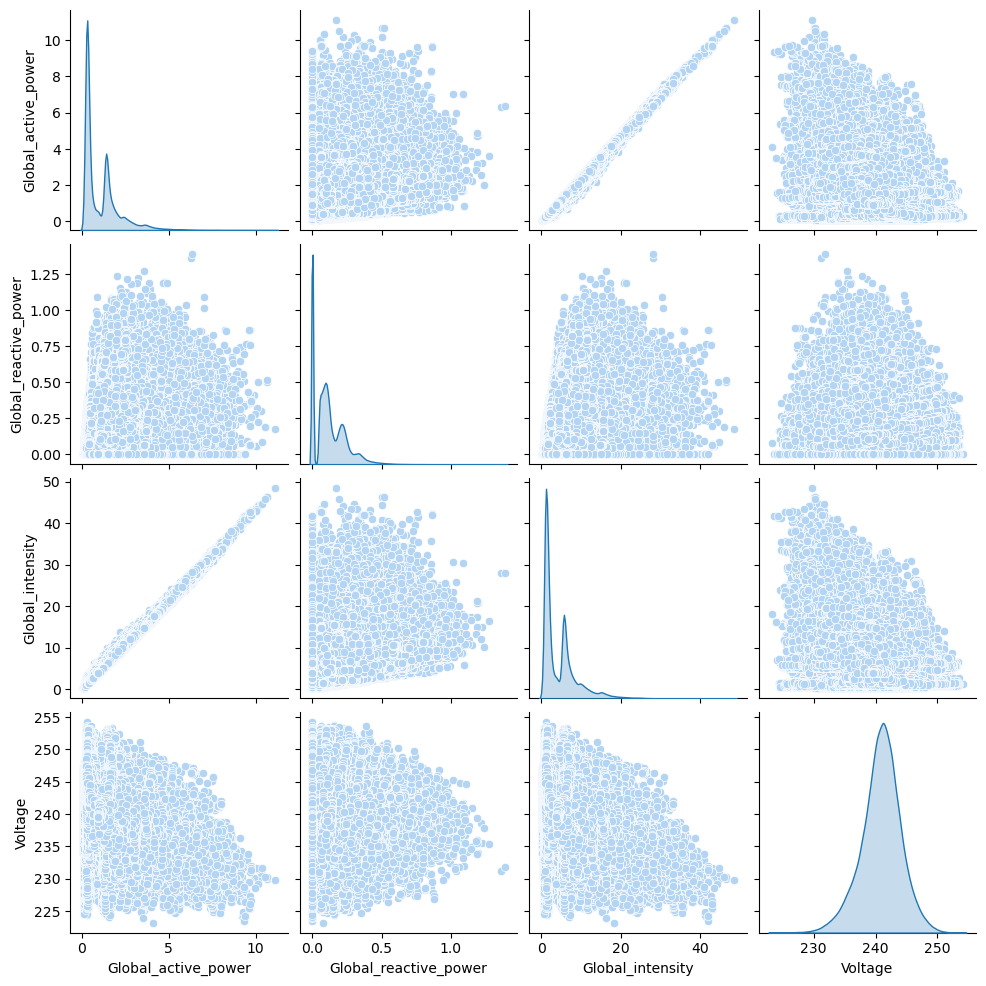

In [41]:
sns.pairplot(df[['Global_active_power','Global_reactive_power','Global_intensity','Voltage']], diag_kind='kde', plot_kws={'color': '#B3D4F2'})
plt.show()

### Insight:
- The data's strongest relationships are perfectly linear: as Global Active Power increases, Global Intensity increases directly alongside it.
- However, Voltage shows very little useful relationship with anything else, proving why it was a poor predictor for total power.